In [2]:
# Homeworks for mlzoomcamp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import pickle

In [3]:
# Q1. Downloading data

In [4]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
display(df_jan.head())
display(df_feb.head())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [5]:
df_jan.shape

(3066766, 19)

In [6]:
# S1. 19 columns

In [7]:
# Q2. Computing duration

In [8]:
df_jan.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [9]:
df_feb.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [10]:
df_jan['duration'] = df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime
df_jan['duration'] = df_jan.duration.apply(lambda td: td.total_seconds() / 60)
df_jan['duration']

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: duration, Length: 3066766, dtype: float64

In [11]:
df_jan.duration.std()

42.59435124195458

In [12]:
# S2. Standard devaition: 42.59

In [13]:
# Q3. Dropping outliers

In [14]:
df_jan.duration.describe(percentiles=[0.90, 0.92, 0.95, 0.98, 0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
90%      2.794167e+01
92%      3.055000e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [15]:
df_jan.shape

(3066766, 20)

In [16]:
df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)].shape

(3009173, 20)

In [17]:
(df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)].shape[0] / df_jan.shape[0]) * 100

98.1220282212598

In [18]:
df_jan_filter = df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)]

In [19]:
# S3. 98% of the observations

In [20]:
# Q4 One-hot encoding

In [21]:
df_jan.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [22]:
categorical = ['PULocationID', 'DOLocationID']
display(df_jan_filter[categorical].head())
df_jan_filter[categorical].dtypes

,PULocationID,DOLocationID
0,161,141
1,43,237
2,48,238
3,138,7
4,107,79


PULocationID    int64
DOLocationID    int64
dtype: object

In [23]:
# Cast to strings
df_jan_filter.PULocationID = df_jan_filter.PULocationID.astype(str)
df_jan_filter.DOLocationID = df_jan_filter.DOLocationID.astype(str)
df_jan_filter[categorical].dtypes

/tmp/ipykernel_24114/1593648027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_filter.PULocationID = df_jan_filter.PULocationID.astype(str)
/tmp/ipykernel_24114/1593648027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_filter.DOLocationID = df_jan_filter.DOLocationID.astype(str)


PULocationID    object
DOLocationID    object
dtype: object

In [24]:
# Encode them
dv = DictVectorizer()
train_dicts = df_jan_filter[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
X_train.shape

(3009173, 515)

In [25]:
# S4. 515 observations

In [26]:
# Q5. Training a model

In [27]:
target = ['duration']
y_train = df_jan_filter[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print(mean_squared_error(y_train, y_pred, squared=False))

7.649261932106969


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
# S5. RMSE on train: 7.64

In [29]:
# Q6. Evaluating model

In [30]:
df_feb['duration'] = df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime
df_feb['duration'] = df_feb.duration.apply(lambda td: td.total_seconds() / 60)
df_feb_filter = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]
df_feb_filter[categorical] = df_feb_filter[categorical].astype(str)
val_dicts = df_feb_filter[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_feb_filter[target].values

y_pred_val = lr.predict(X_val)
print(mean_squared_error(y_val, y_pred_val, squared=False))

/tmp/ipykernel_24114/2425924294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feb_filter[categorical] = df_feb_filter[categorical].astype(str)


7.811818743246608


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/tmp/ipykernel_24114/149011505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, label='actual')
/tmp/ipykernel_24114/149011505.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_val, label='prediction')


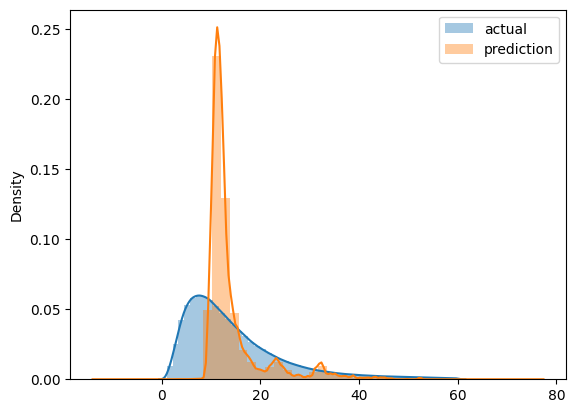

In [31]:
sns.distplot(y_val, label='actual')
sns.distplot(y_pred_val, label='prediction')

plt.legend()

In [ ]:
# S6. RMSE: 7.81